# <h1>Introduction<h1>

In [1]:
!pip install seaborn
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import  MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score



import re
import nltk
import string

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from pathlib import Path
import glob
from collections import OrderedDict

from IPython.display import display

# data set

## creat dataframe

In [3]:
_DATASet_root = 'D:/nhapmonhocmay/' + 'data/'
_test_negative = _DATASet_root + 'test/neg'
_test_positive = _DATASet_root + 'test/pos'
_train_negative = _DATASet_root + 'train/neg'
_train_positive = _DATASet_root + 'train/pos'
_train_unsup = _DATASet_root + 'train/unsup'


def get_path_all_file(file_needed_get):
    path_all_files = glob.glob(str(file_needed_get) + '/**/*.txt', recursive=True)
    return path_all_files



def parser(pathes):
    text_files = OrderedDict()
    text_files['text'] = []
    text_files['label'] = []

    for path_file in pathes:
        with open(path_file, encoding='cp1256') as file:
            data = file.read()
        getid = path_file.split('\\')[-1].split('.')[0].split('_')
        label = 1 if int(getid[1]) > 5 else 0
        
        text_files['text'].append(data)
        text_files['label'].append(label)
        

    df = pd.DataFrame(text_files)
    display(df)
    return df



a = get_path_all_file(_train_positive)[0:70]
b = get_path_all_file(_train_negative)[0:70]
c = get_path_all_file(_test_positive)[0:30]
d = get_path_all_file(_test_negative)[0:30]
a1=parser(a)
b1=parser(b)
c1=parser(c)
d1=parser(d)
df= pd.concat([a1,b1,c1,d1], axis = 0)
display(df)



,text,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1
...,...,...
65,This movie is the best film ever. I can't reme...,1
66,Verhoeven's movie was utter and complete garba...,1
67,Wang Bianlian is an old street performer who i...,1
68,One of the most heart-warming foreign films I'...,1


,text,label
0,Story of a man who has unnatural feelings for ...,0
1,Airport '77 starts as a brand new luxury 747 p...,0
2,This film lacked something I couldn't put my f...,0
3,"Sorry everyone,,, I know this is supposed to b...",0
4,When I was little my parents took me along to ...,0
...,...,...
65,I was expecting a documentary that focused on ...,0
66,When you go at an open air cinema under the Gr...,0
67,"The author sets out on a ""journey of discovery...",0
68,'The Curse of Frankenstein' sticks faithfully ...,0


,text,label
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1
5,"I saw this film on September 1st, 2005 in Indi...",1
6,"Maybe I'm reading into this too much, but I wo...",1
7,I felt this film did have many good qualities....,1
8,This movie is amazing because the fact that th...,1
9,"""Quitting"" may be as much about exiting a pre-...",1


,text,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0
5,"A funny thing happened to me while watching ""M...",0
6,This German horror film has to be one of the w...,0
7,"Being a long-time fan of Japanese film, I expe...",0
8,"""Tokyo Eyes"" tells of a 17 year old Japanese g...",0
9,Wealthy horse ranchers in Buenos Aires have a ...,0


,text,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1
...,...,...
25,1980 was certainly a year for bad backwoods sl...,0
26,Everything everyone has said already pretty mu...,0
27,"Uhhh ... so, did they even have writers for th...",0
28,"Oh yeah, this one is definitely a strong conte...",0


In [4]:
df["text_lower"] = df["text"].str.lower()
df[['text', 'text_lower']].head()

,text,text_lower
0,Bromwell High is a cartoon comedy. It ran at t...,bromwell high is a cartoon comedy. it ran at t...
1,Homelessness (or Houselessness as George Carli...,homelessness (or houselessness as george carli...
2,Brilliant over-acting by Lesley Ann Warren. Be...,brilliant over-acting by lesley ann warren. be...
3,This is easily the most underrated film inn th...,this is easily the most underrated film inn th...
4,This is not the typical Mel Brooks film. It wa...,this is not the typical mel brooks film. it wa...


In [5]:
def remove_punctuation(text):
  """custom function to remove the punctuation"""
  return re.sub(r'[^\w\s]', '', text)
  
df["text_wo_punct"] = df["text_lower"].apply(lambda text: remove_punctuation(text))
df[['text_lower', 'text_wo_punct']].head()

,text_lower,text_wo_punct
0,bromwell high is a cartoon comedy. it ran at t...,bromwell high is a cartoon comedy it ran at th...
1,homelessness (or houselessness as george carli...,homelessness or houselessness as george carlin...
2,brilliant over-acting by lesley ann warren. be...,brilliant overacting by lesley ann warren best...
3,this is easily the most underrated film inn th...,this is easily the most underrated film inn th...
4,this is not the typical mel brooks film. it wa...,this is not the typical mel brooks film it was...


### remove stopwords

In [6]:
from nltk.corpus import stopwords
nltk.download('stopwords')
", ".join(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [7]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
df[['text_wo_punct', 'text_wo_stop']].head()

,text_wo_punct,text_wo_stop
0,bromwell high is a cartoon comedy it ran at th...,bromwell high cartoon comedy ran time programs...
1,homelessness or houselessness as george carlin...,homelessness houselessness george carlin state...
2,brilliant overacting by lesley ann warren best...,brilliant overacting lesley ann warren best dr...
3,this is easily the most underrated film inn th...,easily underrated film inn brooks cannon sure ...
4,this is not the typical mel brooks film it was...,typical mel brooks film much less slapstick mo...


### Removal of Frequent words

In [8]:
from collections import Counter
cnt = Counter()
for text in df["text_wo_stop"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

[('br', 546),
 ('movie', 443),
 ('film', 311),
 ('one', 221),
 ('like', 181),
 ('story', 142),
 ('good', 124),
 ('time', 112),
 ('even', 112),
 ('see', 102)]

In [9]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["text_wo_stopfreq"] = df["text_wo_stop"].apply(lambda text: remove_freqwords(text))
df[['text_wo_stop', 'text_wo_stopfreq']].head()

,text_wo_stop,text_wo_stopfreq
0,bromwell high cartoon comedy ran time programs...,bromwell high cartoon comedy ran programs scho...
1,homelessness houselessness george carlin state...,homelessness houselessness george carlin state...
2,brilliant overacting lesley ann warren best dr...,brilliant overacting lesley ann warren best dr...
3,easily underrated film inn brooks cannon sure ...,easily underrated inn brooks cannon sure flawe...
4,typical mel brooks film much less slapstick mo...,typical mel brooks much less slapstick movies ...


### Removal of Rare words

In [10]:
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remove the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

df["text_wo_stopfreqrare"] = df["text_wo_stopfreq"].apply(lambda text: remove_rarewords(text))
df[['text_wo_stopfreq', 'text_wo_stopfreqrare']].head()

,text_wo_stopfreq,text_wo_stopfreqrare
0,bromwell high cartoon comedy ran programs scho...,bromwell high cartoon comedy ran programs scho...
1,homelessness houselessness george carlin state...,homelessness houselessness george carlin state...
2,brilliant overacting lesley ann warren best dr...,brilliant overacting lesley ann warren best dr...
3,easily underrated inn brooks cannon sure flawe...,easily underrated inn brooks cannon sure flawe...
4,typical mel brooks much less slapstick movies ...,typical mel brooks much less slapstick movies ...


### Lemmatization

In [11]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text_lemmatizer"] = df["text_wo_stopfreqrare"].apply(lambda text: lemmatize_words(text))
df[['text_wo_stopfreqrare', 'text_lemmatizer']].head()

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading omw-1.4: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>


,text_wo_stopfreqrare,text_lemmatizer
0,bromwell high cartoon comedy ran programs scho...,bromwell high cartoon comedy run program schoo...
1,homelessness houselessness george carlin state...,homelessness houselessness george carlin state...
2,brilliant overacting lesley ann warren best dr...,brilliant overact lesley ann warren best drama...
3,easily underrated inn brooks cannon sure flawe...,easily underrated inn brook cannon sure flaw g...
4,typical mel brooks much less slapstick movies ...,typical mel brook much less slapstick movie ac...


In [12]:
df['text'] = df['text_lemmatizer']

# Analysing the data

### Word-Cloud for Positive reviews

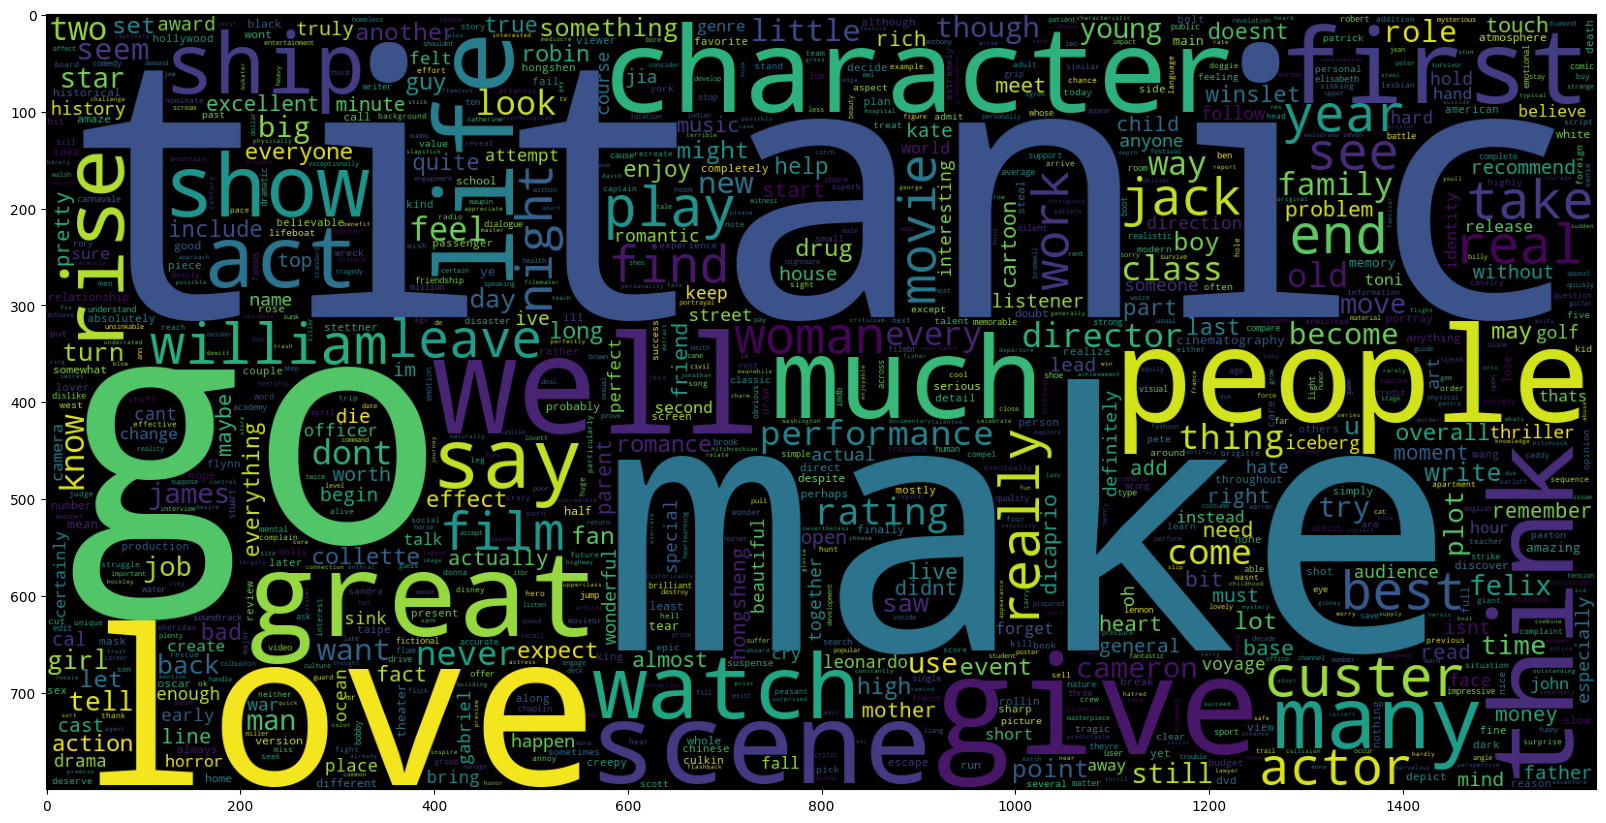

In [13]:
data_pos = df[df.label == 1]['text'].astype(str)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

### Word-Cloud for Negative reviews

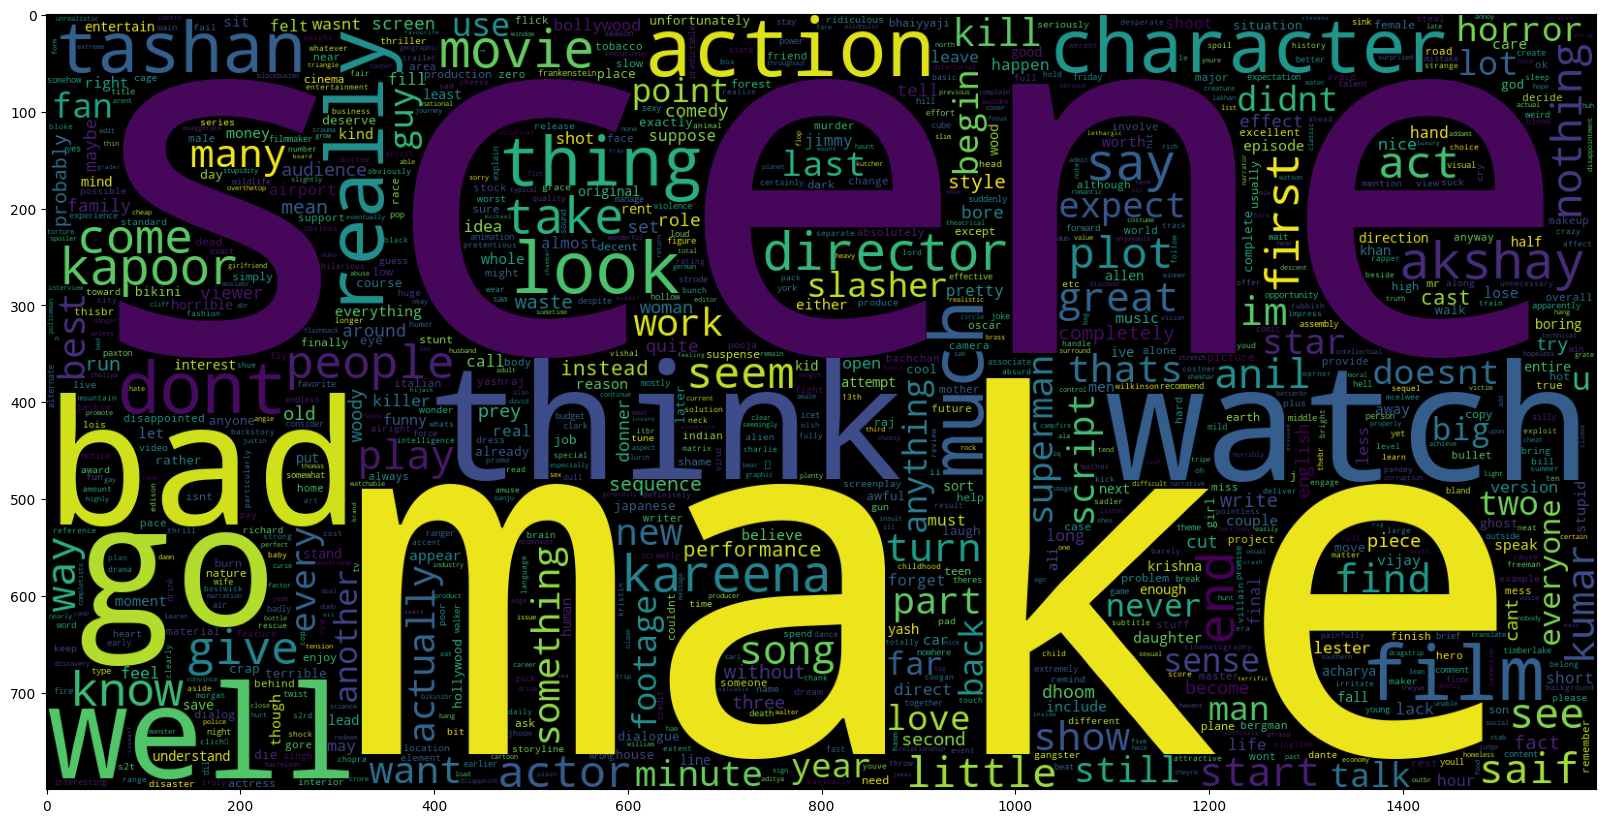

In [14]:
data_neg = df[df.label == 0]['text'].astype(str)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

## tranforming the dataset

In [15]:
vectorizerCount = CountVectorizer()
# vectorizerHash = HashingVectorizer(n_features = 2**10)
# vectorizerTfidf = TfidfVectorizer()

In [16]:
all_features_Count = vectorizerCount.fit_transform(df.text)
# all_features_Hash = vectorizerHash.fit_transform(df.text)
# all_features_Tfidf = vectorizerTfidf.fit_transform(df.text)
# print(all_features_Count.shape)
# print(all_features_Hash.shape)
# print(all_features_Tfidf.shape)

## split data

In [17]:
test_size = 0.3
X_train_Count, X_test_Count, y_train_Count, y_test_Count = train_test_split(all_features_Count, 
                                                            df.label, 
                                                            test_size=test_size, 
                                                            random_state=42, 
                                                            stratify= df.label)

# X_train_Hash, X_test_Hash, y_train_Hash, y_test_Hash = train_test_split(all_features_Hash, 
#                                                             df.label, 
#                                                             test_size=test_size, 
#                                                             random_state=42, 
#                                                             stratify= df.label)

# X_train_Tfidf, X_test_Tfidf, y_train_Tfidf, y_test_Tfidf = train_test_split(all_features_Tfidf, 
#                                                             df.label, 
#                                                             test_size=test_size, 
#                                                             random_state=42, 
#                                                             stratify= df.label)




In [18]:
from sklearn.preprocessing import MaxAbsScaler #fixed import

scaler = MaxAbsScaler()

X_train_Count = scaler.fit_transform(X_train_Count)
X_test_Count = scaler.transform(X_test_Count)

# X_train_Hash = scaler.fit_transform(X_train_Hash)
# X_test_Hash = scaler.transform(X_test_Hash)
# print(X_train_Hash)

# X_train_Tfidf = scaler.fit_transform(X_train_Tfidf)
# X_test_Tfidf = scaler.transform(X_test_Tfidf)

## model


### NB

In [19]:
classifier_nb_Count = MultinomialNB()
t = time.time()
classifier_nb_Count.fit(X_train_Count, y_train_Count)
time_for_train_nb = time.time()-t
print(f'Time Taken: {time_for_train_nb} seconds')

# classifier_nb_Hash = MultinomialNB()
# t = time.time()
# classifier_nb_Hash.fit(X_train_Hash, y_train_Hash)
# time_for_train_nb = time.time()-t
# print(f'Time Taken: {time_for_train_nb} seconds')

# classifier_nb_Tfidf = MultinomialNB()
# t = time.time()
# classifier_nb_Tfidf.fit(X_train_Tfidf, y_train_Tfidf)
# time_for_train_nb = time.time()-t
# print(f'Time Taken: {time_for_train_nb} seconds')

Time Taken: 0.0030019283294677734 seconds


### KNN

In [20]:
classifier_knn_Count = KNeighborsClassifier(n_neighbors=7)
t = time.time()
classifier_knn_Count.fit(X_train_Count,y_train_Count)
time_for_train_knn = time.time()-t
print(f'Time Taken: {time_for_train_knn} seconds')

# classifier_knn_Hash = KNeighborsClassifier(n_neighbors=7)
# t = time.time()
# classifier_knn.fit(X_train_Hash,y_train_Hash)
# time_for_train_knn = time.time()-t
# print(f'Time Taken: {time_for_train_knn} seconds')

# classifier_knn_Tfidf = KNeighborsClassifier(n_neighbors=7)
# t = time.time()
# classifier_knn.fit(X_train_Tfidf,y_train_Tfidf)
# time_for_train_knn = time.time()-t
# print(f'Time Taken: {time_for_train_knn} seconds')

Time Taken: 0.0009992122650146484 seconds


### SVM

In [21]:
# svm rbf
classifier_svm_rbf_Count = SVC(C = 1,kernel = 'rbf')
t = time.time()
classifier_svm_rbf_Count.fit(X_train_Count, y_train_Count)
time_for_train_svm_rbf = time.time()-t
print(f'Time Taken: {time_for_train_svm_rbf} seconds')

# # svm rbf
# classifier_svm_rbf_Hash = SVC(C = 1,kernel = 'rbf')
# t = time.time()
# classifier_svm_rbf.fit(X_train_Hash, y_train_Hash)
# time_for_train_svm_rbf = time.time()-t
# print(f'Time Taken: {time_for_train_svm_rbf} seconds')

# # svm rbf
# classifier_svm_rbf_Tfidf = SVC(C = 1,kernel = 'rbf')
# t = time.time()
# classifier_svm_rbf.fit(X_train_Tfidf, y_train_Tfidf)
# time_for_train_svm_rbf = time.time()-t
# print(f'Time Taken: {time_for_train_svm_rbf} seconds')

Time Taken: 0.015997886657714844 seconds


In [22]:
# svm linear
classifier_svm_linear_Count = SVC(C = 1,kernel = 'linear')
t = time.time()
classifier_svm_linear_Count.fit(X_train_Count, y_train_Count)
time_for_train_svm_linear = time.time()-t
print(f'Time Taken: {time_for_train_svm_linear} seconds')

# classifier_svm_linear_Hash = SVC(C = 1,kernel = 'linear')
# t = time.time()
# classifier_svm_linear.fit(X_train_Hash, y_train_Hash)

# time_for_train_svm_linear = time.time()-t
# print(f'Time Taken: {time_for_train_svm_linear} seconds')

# classifier_svm_linear_Tfidf = SVC(C = 1,kernel = 'linear')
# t = time.time()
# classifier_svm_linear.fit(X_train_Tfidf, y_train_Tfidf)
# time_for_train_svm_linear = time.time()-t
# print(f'Time Taken: {time_for_train_svm_linear} seconds')

Time Taken: 0.019002914428710938 seconds


### decision tree

In [23]:
classifier_dtree_Count = DecisionTreeClassifier(criterion = 'entropy')
t = time.time()
classifier_dtree_Count.fit(X_train_Count, y_train_Count)
time_for_train_dtree = time.time()-t
print(f'Time Taken: {time_for_train_dtree} seconds')

# classifier_dtree_Hash = DecisionTreeClassifier(criterion = 'entropy')
# t = time.time()
# classifier_dtree.fit(X_train_Hash, y_train_Hash)
# time_for_train_dtree = time.time()-t
# print(f'Time Taken: {time_for_train_dtree} seconds')

# classifier_dtree_Tfidf = DecisionTreeClassifier(criterion = 'entropy')
# t = time.time()
# classifier_dtree.fit(X_train_Tfidf, y_train_Tfidf)
# time_for_train_dtree = time.time()-t
# print(f'Time Taken: {time_for_train_dtree} seconds')

Time Taken: 0.03303718566894531 seconds


## Evalution

In [24]:
# source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
class_names = ['Negative', 'Positive']

def model_Evaluate(model, name):
    if (name == 'Count'): 
        y_pred_Count = model.predict(X_test_Count)
        print(classification_report(y_test_Count, y_pred_Count))

        for title, normalize in titles_options:
          disp = ConfusionMatrixDisplay.from_predictions(
              y_test_Count,
              y_pred_Count,
              display_labels=class_names,
              cmap=plt.cm.Blues,
              normalize=normalize,
          )
        
        
    if (name == 'Hash'): 
        y_pred_Hash = model.predict(X_test_Hash)
        print(classification_report(y_test_Hash, y_pred_Hash))

        for title, normalize in titles_options:
          disp = ConfusionMatrixDisplay.from_predictions(
              y_test_Hash,
              y_pred_Hash,
              display_labels=class_names,
              cmap=plt.cm.Blues,
              normalize=normalize,
          )
        

    if (name == 'Tfidf'): 
        y_pred_Tfidf = model.predict(X_test_Tfidf)
        print(classification_report(y_test_Tfidf, y_pred_Tfidf))

        for title, normalize in titles_options:
          disp = ConfusionMatrixDisplay.from_predictions(
              y_test_Tfidf,
              y_pred_Tfidf,
              display_labels=class_names,
              cmap=plt.cm.Blues,
              normalize=normalize,
          )
        
    disp.ax_.set_title(title)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)

              precision    recall  f1-score   support

           0       0.78      0.23      0.36        30
           1       0.55      0.93      0.69        30

    accuracy                           0.58        60
   macro avg       0.66      0.58      0.53        60
weighted avg       0.66      0.58      0.53        60



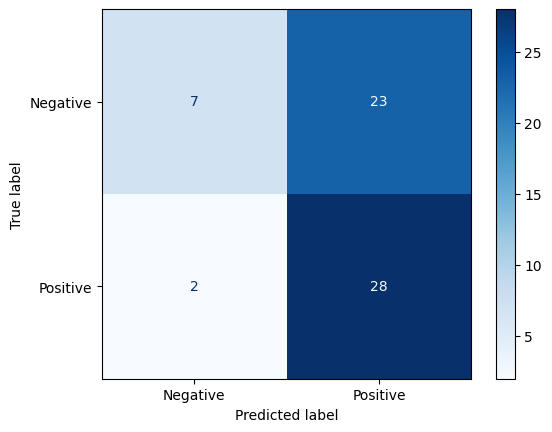

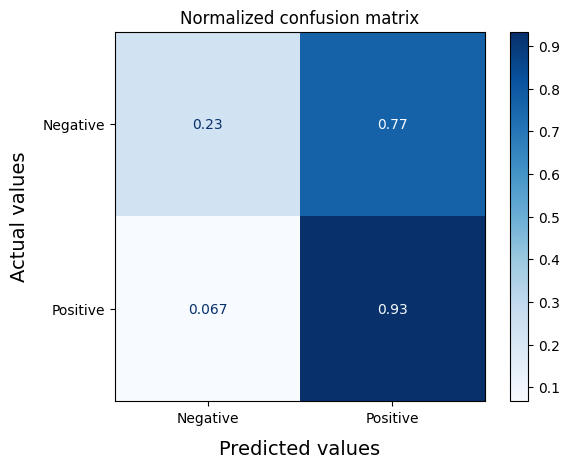

In [25]:
model_Evaluate(classifier_knn_Count, "Count")
# model_Evaluate(classifier_knn_Hash, "Hash")
# model_Evaluate(classifier_knn_Tfidf, "Tfidf")

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        30
           1       0.89      0.80      0.84        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



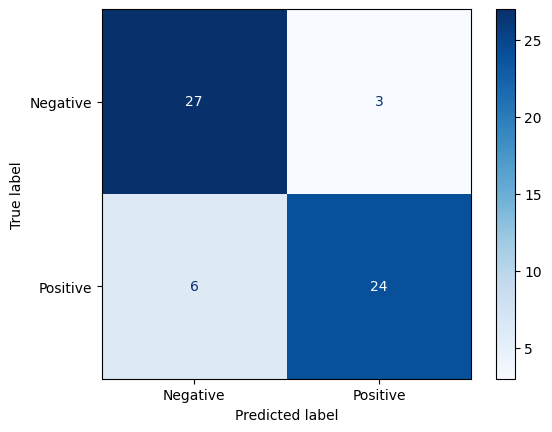

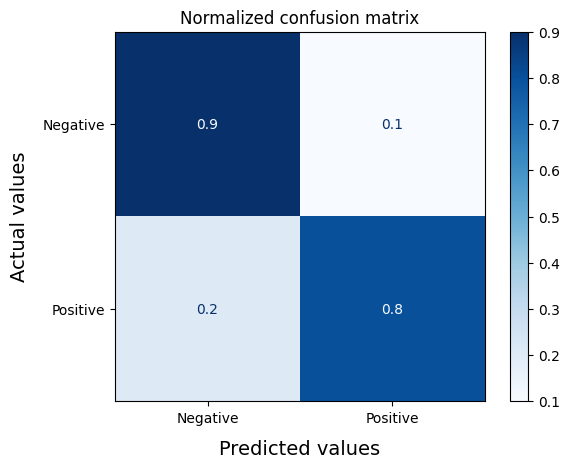

In [26]:
model_Evaluate(classifier_nb_Count, "Count")

              precision    recall  f1-score   support

           0       0.57      0.83      0.68        30
           1       0.69      0.37      0.48        30

    accuracy                           0.60        60
   macro avg       0.63      0.60      0.58        60
weighted avg       0.63      0.60      0.58        60



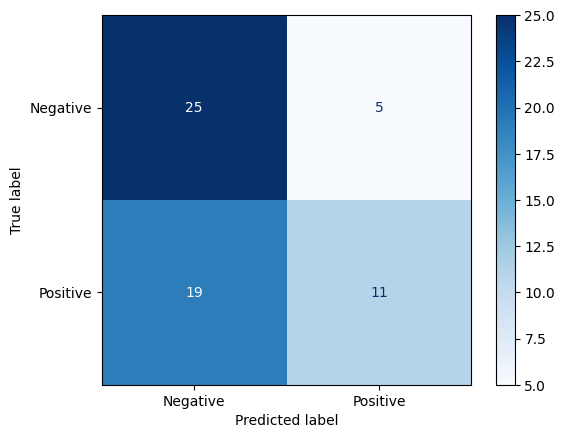

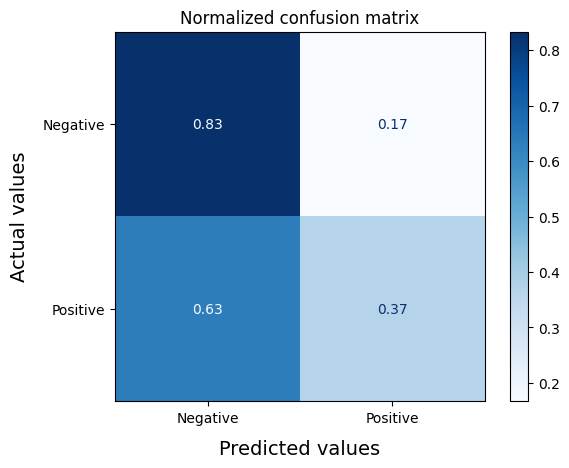

In [27]:
model_Evaluate(classifier_svm_rbf_Count, "Count")

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.89      0.83      0.86        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



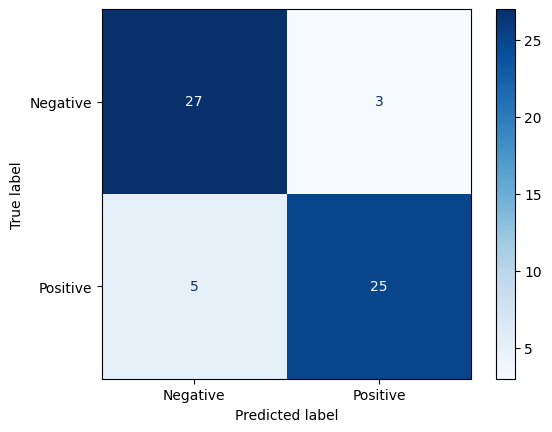

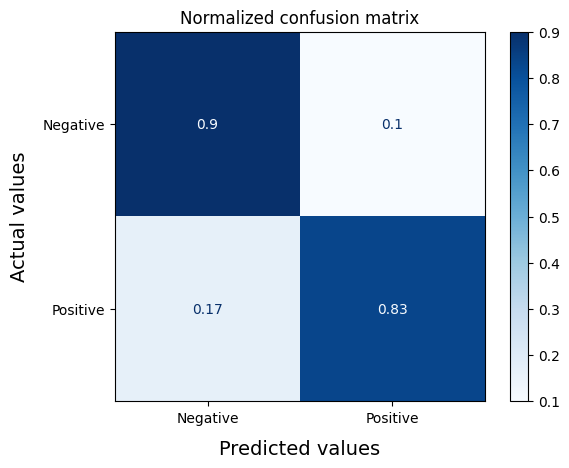

In [28]:
model_Evaluate(classifier_svm_linear_Count, "Count")

              precision    recall  f1-score   support

           0       0.62      0.77      0.69        30
           1       0.70      0.53      0.60        30

    accuracy                           0.65        60
   macro avg       0.66      0.65      0.65        60
weighted avg       0.66      0.65      0.65        60



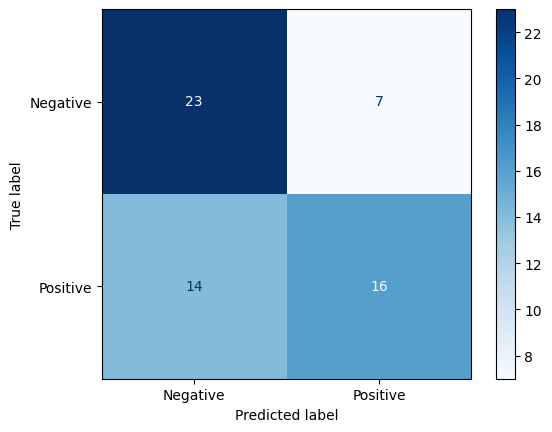

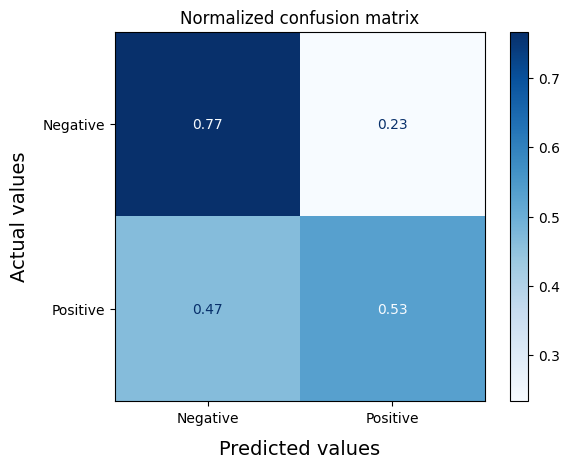

In [29]:
model_Evaluate(classifier_dtree_Count, "Count")

## Compare

In [30]:
t = time.time()
y_pred = classifier_nb_Count.predict(X_test_Count)
time_for_predict_nb = time.time() - t
acc_nb = accuracy_score(y_test_Count, y_test_Count)

t = time.time()
y_pred = classifier_knn_Count.predict(X_test_Count)
time_for_predict_knn = time.time() - t
acc_knn = accuracy_score(y_test_Count, y_test_Count)

t = time.time()
y_pred = classifier_svm_rbf_Count.predict(X_test_Count)
time_for_predict_svm_rbf = time.time() - t
acc_svm_rbf = accuracy_score(y_test_Count, y_test_Count)

t = time.time()
y_pred = classifier_svm_linear_Count.predict(X_test_Count)
time_for_predict_svm_linear = time.time() - t
acc_svm_linear = accuracy_score(y_test_Count, y_test_Count)

t = time.time()
y_pred = classifier_dtree_Count.predict(X_test_Count)
time_for_predict_dtree = time.time() - t
acc_dtree = accuracy_score(y_test_Count, y_test_Count)

In [31]:
print(f'KNN:           Train: {time_for_train_knn:.3f}s, Predict: {time_for_predict_knn:.3f}s, Accuracy: {acc_knn*100:.2f}%')
print(f'Naive Bayes:   Train: {time_for_train_nb:.3f}s, Predict: {time_for_predict_nb:.3f}s, Accuracy: {acc_nb*100:.2f}%')
print(f'SVM rbf:       Train: {time_for_train_svm_rbf:.3f}s, Predict: {time_for_predict_svm_rbf:.3f}s, Accuracy: {acc_svm_rbf*100:.2f}%')
print(f'SVM linear:    Train: {time_for_train_svm_linear:.3f}s, Predict: {time_for_predict_svm_linear:.3f}s, Accuracy: {acc_svm_linear*100:.2f}%')
print(f'Decision Tree: Train: {time_for_train_dtree:.3f}s, Predict: {time_for_predict_dtree:.3f}s, Accuracy: {acc_dtree*100:.2f}%')

KNN:           Train: 0.001s, Predict: 0.047s, Accuracy: 100.00%
Naive Bayes:   Train: 0.003s, Predict: 0.000s, Accuracy: 100.00%
SVM rbf:       Train: 0.016s, Predict: 0.008s, Accuracy: 100.00%
SVM linear:    Train: 0.019s, Predict: 0.007s, Accuracy: 100.00%
Decision Tree: Train: 0.033s, Predict: 0.000s, Accuracy: 100.00%


# using Bert


In [32]:
!pip install transformers

In [33]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast


In [34]:
# Tạo danh sách câu và nhãn
text = df.text.values
label = df.label.values
print(text)
print(label)


['bromwell high cartoon comedy run program school life teacher 35 year teach profession lead believe bromwell high satire much close reality teacher scramble survive financially insightful student right pathetic teacher pomp pettiness whole situation remind school know student saw episode student repeatedly try burn school immediately recall high classic line inspector im sack teacher student welcome bromwell high expect many adult age think bromwell high far fetched pity isnt'
 'homelessness houselessness george carlin state issue year never plan help street consider human everything go school work vote matter people think homeless lose cause worry thing racism war iraq pressure kid succeed technology election inflation worry theyll next end streetsbr give bet live street month without luxury home entertainment set bathroom picture wall computer everything treasure homeless goddard bolt lessonbr mel brook direct star bolt play rich man everything world decide make bet sissy rival jeff

In [35]:
train_text, temp_text, train_labels, temp_labels = train_test_split(df['text'], df['label'], 
                                                                    random_state=2018, 
                                                                    test_size=0.3, 
                                                                    stratify=df['label'])

# we will use temp_text and temp_labels to create validation and test set
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=2018, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels)

In [36]:
print(test_labels)
print(train_labels)

64    1
1     0
12    1
59    1
65    1
42    1
47    1
4     1
22    0
38    0
39    1
21    0
60    0
26    0
29    0
26    1
12    1
5     0
17    0
53    0
31    1
1     1
11    0
50    1
69    1
30    1
22    0
69    0
42    0
25    0
Name: label, dtype: int64
33    1
19    0
62    0
19    0
24    0
     ..
11    1
3     1
18    0
18    0
22    1
Name: label, Length: 140, dtype: int64


## Import Bertmodel and BertTokenizer

In [37]:
# import BERT-base pretrained model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [38]:
# sample data
text = ["this is a bert model tutorial", "we will fine-tune a bert model"]

# encode text
sent_id = tokenizer.batch_encode_plus(text, padding=True, return_token_type_ids=False)

In [39]:
# output
print(sent_id)

{'input_ids': [[101, 2023, 2003, 1037, 14324, 2944, 14924, 4818, 102, 0], [101, 2057, 2097, 2986, 1011, 8694, 1037, 14324, 2944, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


## Tokenizer

<Axes: >

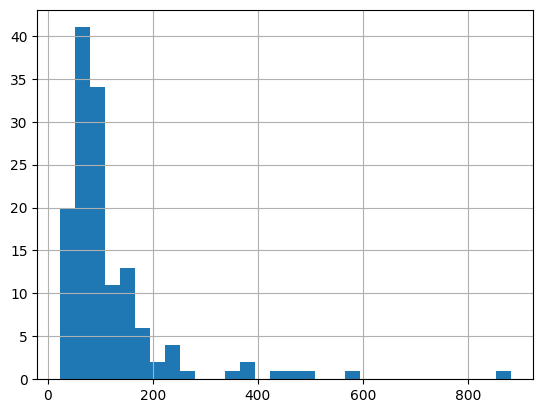

In [40]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 30)

In [41]:
max_seq_len = 25

In [42]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


## convert integer sequences to Tensors

In [43]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

## Creat dataloader

In [44]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

## Freeze BERT Parameters

In [45]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

## Define Model Architecture

In [46]:
class BERT_Arch(nn.Module):

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask,  return_dict=False)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [47]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)


In [48]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-3)

C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


## Find class Weight

In [49]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights
class_wts = compute_class_weight(class_weight = 'balanced',classes = np.unique(train_labels),y= train_labels)

print(class_wts)

[1. 1.]


In [50]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 10

## Fine_turn BERT

In [51]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    sent_id, mask, labels = batch
    print(labels)

    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [52]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(val_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))


    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(val_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

## start Model training

In [53]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()
    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 10
tensor([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 0, 0])
tensor([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 0])
tensor([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 1, 1, 0, 0, 1])
tensor([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0])
tensor([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1])

Evaluating...

Training Loss: 0.921
Validation Loss: 0.860

 Epoch 2 / 10
tensor([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 1])
tensor([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 1, 0])
tensor([0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 1])
tensor([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 

## Load save model

In [54]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

## get predicttion for test data

In [55]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

In [56]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        15
           1       0.00      0.00      0.00        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30



C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [57]:
# confusion matrix
pd.crosstab(test_y, preds)

col_0,0
row_0,
0,15
1,15
